In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Pacejka Magic Formula

In [23]:
def long_fit(data, b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, IA_coeff_mult, IA_coeff_shift):
    FZ = data[0] / 1000 * -1
    SR = data[1]
    IA = data[2]

    C = b0
    D = FZ * (b1 * FZ + b2)
    
    BCD = (b3 * FZ**2 + b4 * FZ) * np.exp(-1 * b5 * FZ)
    B = BCD / (C * D)
    H = b9 * FZ + b10

    E = (b6 * FZ**2 + b7 * FZ + b8) * (1 - b13 * np.sign(SR + H))

    V = b11 * FZ + b12
    Bx1 = B * (SR + H)

    return (D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V) * (IA * IA_coeff_mult + IA_coeff_shift)

### Desired Parameters for Filtering

In [4]:
tires = {"hoosier_r25b_16x7-5_10x7":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
run_num = 1

### Import and Filter Tire Data

In [5]:
for name, tire in tires.items():
    try:
        df = pd.read_csv(f"../tire_data/processed_data/braking_{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity)]
        # print(tire["long"])
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../tire_data/processed_data/cornering_{name}.csv")
        tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure)]
        # print(tire["lat"])

    except:
        print("Error getting lateral data for {0}".format(name))

Error getting lateral data for hoosier_r25b_16x7-5_10x7


### Define Coefficients

In [35]:
df = tires["hoosier_r25b_16x7-5_10x7"]["long"]
x_lst = [x for x in df["load"].tolist()]
y_lst = [x * 100 for x in df["SL"].tolist()]
z_lst = df["FX"].tolist()

optimal = [2.4299544011118486, 192.6439205435163, 3004.4868352663448, -401.46670130280563, 702.5750678614955, -0.1860057989059407, 3.842257055358237, -0.1704186126594227, -3.1689361773408438, -1.4021441268634667, 1.009248943160487, 0.7748110187699014, 0.5893057407163083, 0.2779580699825117, 1000, 1000]

### Plotting

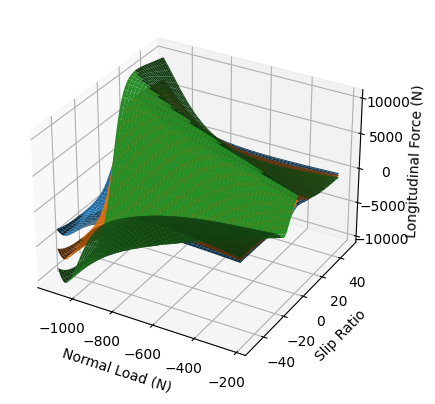

In [36]:
model_x_data = np.linspace(min(x_lst), max(x_lst), 1000)
model_y_data = np.linspace(-50, 50, 100)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

W1 = long_fit([X, Y, 0], *optimal) / 1000

W2 = long_fit([X, Y, 1], *optimal) / 1000

W3 = long_fit([X, Y, 2], *optimal) / 1000

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(X, Y, W1)
ax.plot_surface(X, Y, W2)
ax.plot_surface(X, Y, W3)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Ratio')
ax.set_zlabel('Longitudinal Force (N)')

plt.show()

In [30]:
W = long_fit([-250 / 0.224809, 4, 2], *optimal) / 1000
print(W)

3517.9192511441565
